<a href="https://colab.research.google.com/github/pearllpatell/BusinessAnalyticsIS4487_Patel/blob/main/lab7_retailer_eda2_patel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl
import numpy as np
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
df = pd.read_csv ('superstore_retail_orders.csv')

print(df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01          2021-07     Audrey Blanco   
1         51187  2021-07-01          2021-07       Isaac Allen   
2         51199  2021-07-02          2021-07        Ian Morgan   
3         51241  2021-07-04          2021-07        Alexa Bell   
4         51297  2021-07-08          2021-07        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29          2022-06        Ian Rogers   
56041     74062  2022-06-29          2022-06   Marcus Anderson   
56042     74065  2022-06-29          2022-06  Nathaniel Howard   
56043     74038  2022-06-29          2022-06        Robin Sanz   
56044     74110  2022-06-30          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [4]:
# Convert columns to their appropriate dtypes automatically
df = df.apply(pd.to_numeric, errors='ignore')

# Convert character variables to categorical if appropriate
for col in df.columns:
    if df[col].dtype == 'object':
        if len(df[col].unique()) / len(df) < 0.5:
            df[col] = df[col].astype('category')

# Check for outliers and remove them
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Remove rows with NULL values
df.dropna(inplace=True)

# Add a "total_amount" variable based on the quantity and price
df['total_amount'] = df['quantity'] * df['product_price']


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

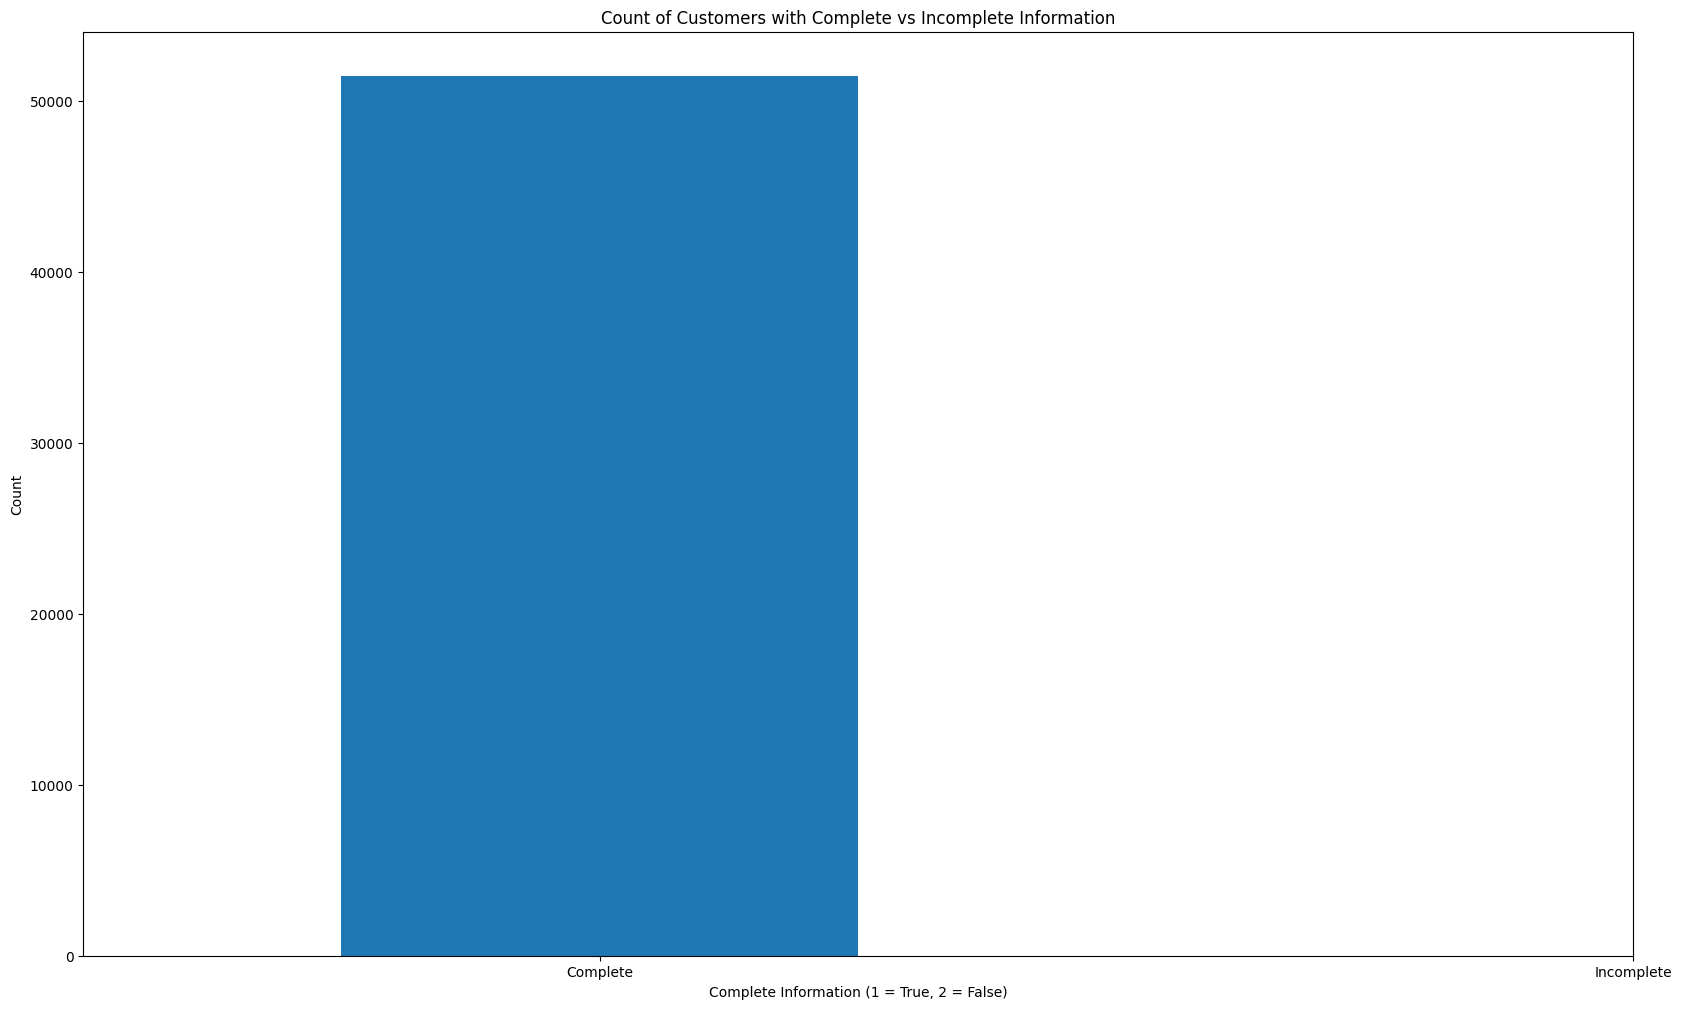

In [6]:
# Define customer fields to check for completeness
customer_fields = ['customer_name', 'city', 'state_province']

# Create a variable "complete_customer_info": 1 for True (complete), 2 for False (incomplete)
df['complete_customer_info'] = df[customer_fields].notnull().all(axis=1).astype(int) + 1

# Create a bar chart for the count of customers with complete vs incomplete information
complete_info_counts = df['complete_customer_info'].value_counts().sort_index()

plt.figure(figsize=(20, 12))
complete_info_counts.plot(kind='bar')
plt.title('Count of Customers with Complete vs Incomplete Information')
plt.xlabel('Complete Information (1 = True, 2 = False)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Complete', 'Incomplete'], rotation=0)
plt.show()


## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

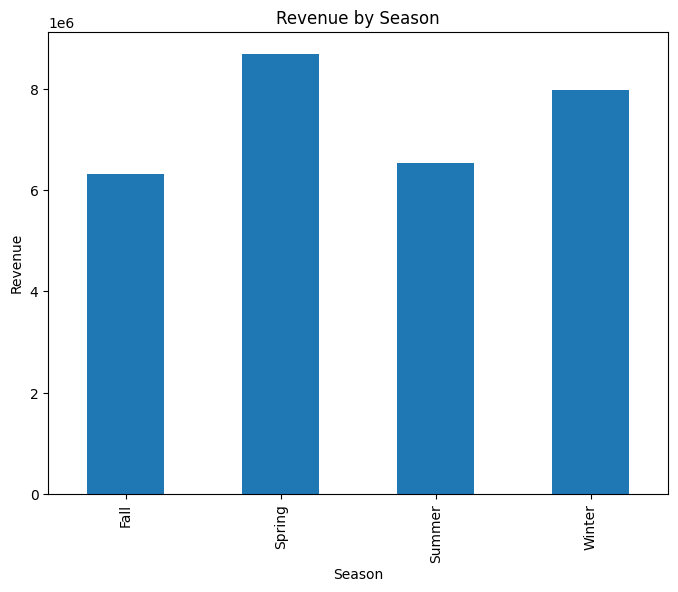

In [8]:
# Correct date parsing with a function to handle potential out-of-bounds dates
def parse_dates(date):
    try:
        return pd.to_datetime(date, errors='coerce')
    except OutOfBoundsDatetime:
        return pd.NaT

# Apply date parsing correction and drop any resulting NaT values
df['order_date'] = df['order_date'].apply(parse_dates)
df.dropna(subset=['order_date'], inplace=True)

# Define the seasons
seasons = {
    'Winter': (12, 1, 2),
    'Spring': (3, 4, 5),
    'Summer': (6, 7, 8),
    'Fall': (9, 10, 11)
}

# Assign each order to a season
df['season'] = df['order_date'].dt.month.map(lambda x: next(season for season, months in seasons.items() if x in months))

# Assign the year from the order date for yearly analysis
df['year'] = df['order_date'].dt.year

# Calculate and plot revenue by season
seasonal_revenue = df.groupby('season')['total_amount'].sum()
plt.figure(figsize=(8, 6))
seasonal_revenue.plot(kind='bar')
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.show()


In [ ]:
#revenue over time

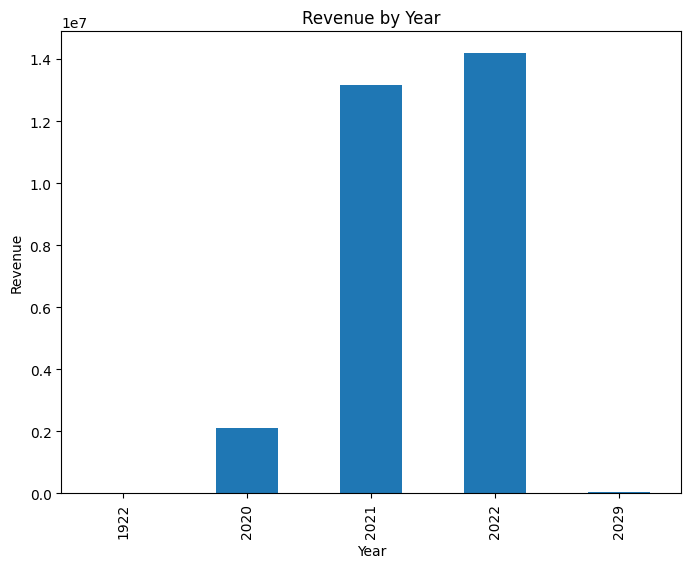

In [9]:
# Calculate and plot revenue by year
yearly_revenue = df.groupby('year')['total_amount'].sum()
plt.figure(figsize=(8, 6))
yearly_revenue.plot(kind='bar')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [ ]:
#indoor/outdoor variable

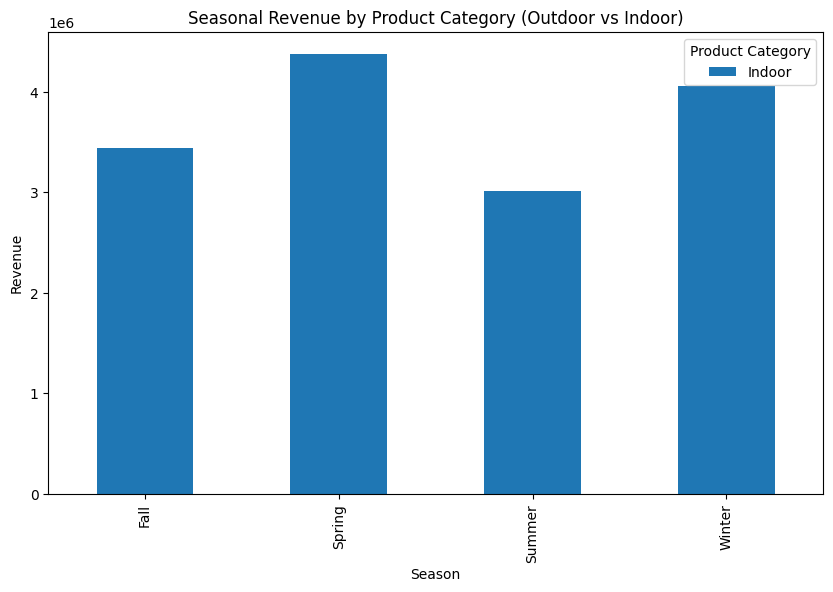

In [13]:
# Map product lines to "Outdoor" vs "Indoor" categories
product_line_mapping = {
    'Gardening': 'Outdoor',
    'Camping': 'Outdoor',
    'Sports': 'Outdoor',
    'Furniture': 'Indoor',
    'Electronics': 'Indoor',
    'Appliances': 'Indoor',
    'Mobile': 'Indoor'}


df['product_category'] = df['product_line'].map(product_line_mapping)

pivot = df.pivot_table(index='season', columns='product_category', values='total_amount', aggfunc='sum', fill_value=0)
pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Seasonal Revenue by Product Category (Outdoor vs Indoor)')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.legend(title='Product Category')
plt.show()
